## Predicting or Generating next word in an Irish Songs Lyrics

In [1]:
# import libraries

import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# load data
data_path = 'irish_poetry.txt'

In [21]:
## read data

data = []

with open(data_path, 'r') as file:
    data = file.readlines()

data

['Come all ye maidens young and fair\n',
 'And you that are blooming in your prime\n',
 'Always beware and keep your garden fair\n',
 'Let no man steal away your thyme\n',
 'For thyme it is a precious thing\n',
 'And thyme brings all things to my mind\n',
 'nlyme with all its flavours, along with all its joys\n',
 'Thyme, brings all things to my mind\n',
 'Once I and a bunch of thyme\n',
 'i thought it never would decay\n',
 'Then came a lusty sailor\n',
 'Who chanced to pass my way\n',
 'And stole my bunch of thyme away\n',
 'The sailor gave to me a rose\n',
 'A rose that never would decay\n',
 'He gave it to me to keep me reminded\n',
 'Of when he stole my thyme away\n',
 'Sleep, my child, and peace attend thee\n',
 'All through the night\n',
 'Guardian angels God will send thee\n',
 'Soft the drowsy hours are creeping\n',
 'Hill and dale in slumber sleeping\n',
 'I my loving vigil keeping\n',
 'While the moon her watch is keeping\n',
 'While the weary world is sleeping\n',
 'Oer thy

## Pre-Processing and setting up the data

In [58]:
# set up the corpus
corpus = [line.lower().rstrip('\n') for line in data]

corpus[0]

'come all ye maidens young and fair'

In [59]:
## NOw, we have the corpus that contains all the lines in the poetry
# check the total number of lines
len(corpus)

1692

## Set up the tokenizer and the sequence data

In [60]:
# intialize the tokenizer

tokenizer = Tokenizer()

# fit on texts
tokenizer.fit_on_texts(corpus)

# word index
word_index = tokenizer.word_index
# print(word_index)

# length of total words
# + 1 for the oov token at the end
total_words = len(word_index) + 1
print('Total Words :{}'.format(total_words))

Total Words :2690


### setting up input sequences

In [61]:
input_sequences = []

for line in corpus:
    
    # convert into sequence
    token_list = tokenizer.texts_to_sequences([line])[0]
    # print(token_list)
    # will give something like this [51, 12, 96, 1217, 48, 2, 69]

    # now for every list of such tokens, we will need to create a n-gram sequence
    for i in range(1, len(token_list)):
        
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
#         print(input_sequences)
# print(input_sequences)   

# lets get the length of the sequence that has the maximum length
max_length = max([len(line) for line in input_sequences])

# padded the input sequences to the max_length so that it can be fed into the network
padded_inputs = pad_sequences(input_sequences, maxlen=max_length, padding='pre')
# print(padded_inputs)

# Set the xs and ys values
# xs values -> all values in the input sequence except the last column which will be 
# set as labels or ys

xs = padded_inputs[:,:-1]
ys = padded_inputs[:,-1]

# print(xs)
# print(ys)
    
# one hot encode the labels
ys = tf.keras.utils.to_categorical(ys, num_classes=total_words)

In [62]:
# check index position for the first label
np.argmax(ys[0])

12

In [63]:
# check the value
input_sequences[0][-1]

12

## Set up the model

In [82]:
LSTM_units = 150
embedding_dim = 50

model = Sequential([
    
    # max_length - 1 as we have used last column for the labels
    Embedding(total_words, embedding_dim, input_length = (max_length - 1)),
    
    Bidirectional(LSTM(LSTM_units)),
    # Dense(128, activation='relu'),
    Dense(total_words, activation='softmax')
    
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 15, 50)            134500    
                                                                 
 bidirectional_4 (Bidirectio  (None, 300)              241200    
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 2690)              809690    
                                                                 
Total params: 1,185,390
Trainable params: 1,185,390
Non-trainable params: 0
_________________________________________________________________


In [83]:
## compile the model
learning_rate = 0.01

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [84]:
## fit the model
num_epochs = 30

model.fit(xs, ys, epochs=num_epochs)

Epoch 1/30
377/377 [==============================] - 14s 28ms/step - loss: 6.6280 - accuracy: 0.0763
Epoch 2/30
377/377 [==============================] - 11s 29ms/step - loss: 5.8681 - accuracy: 0.1038
Epoch 3/30
377/377 [==============================] - 12s 31ms/step - loss: 5.0965 - accuracy: 0.1520
Epoch 4/30
377/377 [==============================] - 12s 32ms/step - loss: 4.2484 - accuracy: 0.2074
Epoch 5/30
377/377 [==============================] - 12s 33ms/step - loss: 3.3931 - accuracy: 0.3010
Epoch 6/30
377/377 [==============================] - 12s 32ms/step - loss: 2.6710 - accuracy: 0.4042
Epoch 7/30
377/377 [==============================] - 12s 32ms/step - loss: 2.1258 - accuracy: 0.5076
Epoch 8/30
377/377 [==============================] - 12s 33ms/step - loss: 1.7219 - accuracy: 0.5938
Epoch 9/30
377/377 [==============================] - 12s 33ms/step - loss: 1.4078 - accuracy: 0.6673
Epoch 10/30
377/377 [==============================] - 12s 33ms/step - loss: 1.215

In [75]:
import matplotlib.pyplot as plt

def plot_utility(df, metric):
    
    epoch_range = range(1, len(df) + 1) 
    plt.plot(epoch_range, df[metric], label = 'training ' + metric)
    plt.legend(loc='best')
    plt.show();    

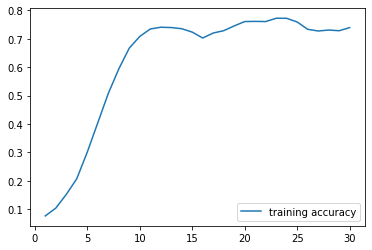

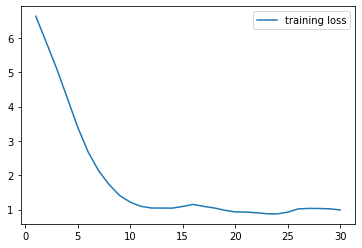

In [85]:
metrics = pd.DataFrame(model.history.history)
# print(metrics)
plot_utility(metrics, 'accuracy')
plot_utility(metrics, 'loss')

## Test to generate next words

- First lets try to generate next one word

In [92]:
# Define seed text
seed_text = "help me obi-wan kinobi youre my only hope"

# Define total words to predict
next_words = 100

# tokenize
test_sample_sequence = tokenizer.texts_to_sequences([seed_text])
print(test_sample_sequence)

# get padded to the (max_length size - 1)
pad_sample = pad_sequences(test_sample_sequence, maxlen=(max_length - 1), padding='pre')
print(pad_sample)

# get prediction probabilities
probabilities = model.predict(pad_sample)

# print(probabilities)

# get the max probability
max_prob = np.argmax(probabilities)
print(max_prob)

# get the word from the index_Word
predicted_word = tokenizer.index_word[max_prob]
print(predicted_word)

[[2338, 9, 2300, 195, 7, 143, 373]]
[[   0    0    0    0    0    0    0    0 2338    9 2300  195    7  143
   373]]
1/1 [==============================] - 0s 98ms/step
158
has


- For next 100 words

### Using the highest probability value

In [96]:
# Define seed text
seed_text = "help me obi-wan kinobi youre my only hope"

# Define total words to predict
next_words = 100

for _ in range(100):
    # tokenize
    test_sample_sequence = tokenizer.texts_to_sequences([seed_text])
#     print(test_sample_sequence)

    # get padded to the (max_length size - 1)
    pad_sample = pad_sequences(test_sample_sequence, maxlen=(max_length - 1), padding='pre')
#     print(pad_sample)

    # get prediction probabilities
    probabilities = model.predict(pad_sample)
    
    # get the max probability
    max_prob = np.argmax(probabilities, axis = -1)[0]
#     print(max_prob)

    # print(probabilities)
    # Ignore if index is 0 because that is just the padding.
    if max_prob != 0:

        # get the word from the index_Word
        predicted_word = tokenizer.index_word[max_prob]
    #     print(predicted_word)

        # append the predicted_word in the seed_text
        seed_text = seed_text + " " + predicted_word
    
print(seed_text)

1/1 [==============================] - 0s 23ms/step
help me obi-wan kinobi youre my only hope has been granted maiden did dying my days ache yore small i bride from your brow love is for your brow love died and eyes i love your brow ache true love me right by the wind wind right right for tree with tree to right to the right more right for a call way sash is a down wid me your brow name love eyes i brow cross the more brow right they more brow love is right for right for now theyre immortal eyes glisten brow girls love a dawn feet did say now twas there i love


help me obi-wan kinobi youre my only hope and no tenant yet lingers to let and gone wexford to give with me a call rose but ill neer forget old love again were mallow this home i did say or in the fine tried for to lions at my love for his dawning glow the begging is the best games played in the row miss kerrigan fainted in solace and stand it my days i was then i love best on my wild throbbing breast for the liffey from his blue day when said my love to come and find me to me mothers house ill in gone



### selecting randomly from the top 3 highest occurance words in the predictions

In [100]:
# Define seed text
seed_text = "help me obi-wan kinobi youre my only hope"

# Define total words to predict
next_words = 100

for _ in range(100):
    # tokenize
    test_sample_sequence = tokenizer.texts_to_sequences([seed_text])
#     print(test_sample_sequence)

    # get padded to the (max_length size - 1)
    pad_sample = pad_sequences(test_sample_sequence, maxlen=(max_length - 1), padding='pre')
#     print(pad_sample)

    # get prediction probabilities
    probabilities = model.predict(pad_sample)
    
    # set choice
    choice = np.random.choice([1,2,3])
    
    # get the max probability
    max_prob = np.argsort(probabilities, axis = -1)[0][-choice]
#     print(max_prob)

    # print(probabilities)
    # Ignore if index is 0 because that is just the padding.
    if max_prob != 0:

        # get the word from the index_Word
        predicted_word = tokenizer.index_word[max_prob]
    #     print(predicted_word)

        # append the predicted_word in the seed_text
        seed_text = seed_text + " " + predicted_word
    
print(seed_text)

1/1 [==============================] - 0s 20ms/step
help me obi-wan kinobi youre my only hope forever back kellswater time it might all meet from my days they souls to know the young pity is peeping on their tree to love right as any throbbing birds sinking right prince your cheer sinking son at health your right for love and the young colleen love all the grey is right where first they were the watch of boyne tree side away your love an oak here back now die my rapier break my molly maid i had bound for your lack from half mchugh mchugh worsened mcbryde fellows for meet a brow new band come wall there
